In [170]:
import numpy as np
import matplotlib.pyplot as plt
from scipy  import fft
from math import pi, exp

In [171]:
c = 2000
f_m = 30
t_0 = 0.05
dt = 0.001
dx = 10

In [172]:
def normalization(data):
    _range = max(np.max(data), abs(np.min(data)))
    return data / _range

In [173]:
source_time_array = np.linspace(0, 0.1, 101)

source_array = (1 - 2 * (pi * f_m * (source_time_array-t_0))**2) \
                * np.exp(-1 * ( pi * f_m * (source_time_array-t_0))**2)

source_time_derivative = 1 * (-4 * (pi * f_m * (source_time_array-t_0)) * pi * f_m * \
                         np.exp(-1 * ( pi * f_m * (source_time_array-t_0))**2) + \
                         (1 - 2 * (pi * f_m * (source_time_array-t_0))**2) * \
                         np.exp(-1 * ( pi * f_m * (source_time_array-t_0))**2) * \
                            -2 * (pi * f_m * (source_time_array-t_0)) * pi * f_m)

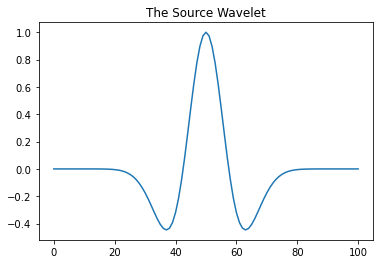

In [174]:
plt.plot(source_time_array * 1000, source_array)
plt.title('The Source Wavelet')
plt.show()

In [175]:
source_omega_array = np.linspace(0, source_time_array.size-1, source_array.size) /(dt * source_time_array.size)

In [176]:
source_array_fft = np.fft.fft(source_array)

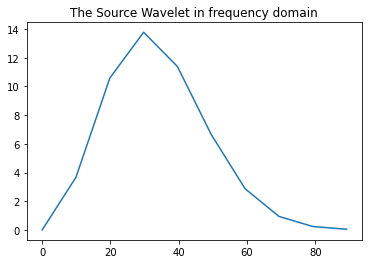

In [177]:
plt.plot(source_omega_array[0:10], np.abs(source_array_fft.real[0:10]))
plt.title('The Source Wavelet in frequency domain')
plt.show()

In [178]:
source_time_derivative_fft = np.fft.fft(source_time_derivative)

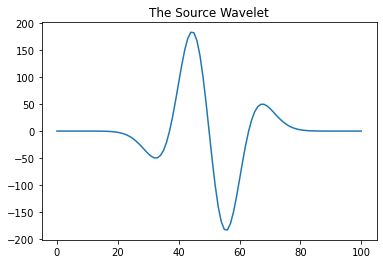

In [179]:
plt.plot(source_time_array * 1000, source_time_derivative)
plt.title('The Source Wavelet')
plt.show()

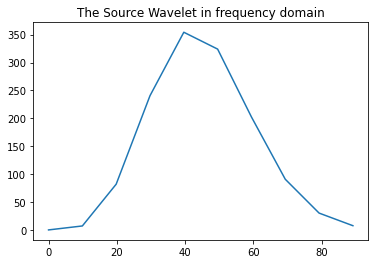

In [180]:
plt.plot(source_omega_array[0:10], np.abs(source_time_derivative_fft.real[0:10]))
plt.title('The Source Wavelet in frequency domain')
plt.show()

In [181]:
total_time_array = np.arange(0,3+dt,dt)
# print(total_time_array.size)
# print(total_time_array[1500])

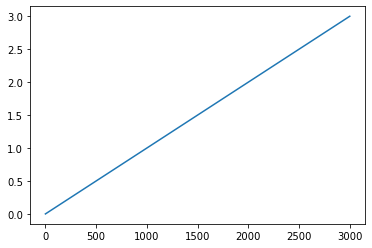

In [182]:
plt.plot(total_time_array)
plt.show()

In [183]:
total_omega_array = np.linspace(0,total_time_array.size-1,total_time_array.size)  / (dt * (total_time_array.size-1))
print(total_omega_array[-1])
print(total_time_array.size)

1000.0
3001


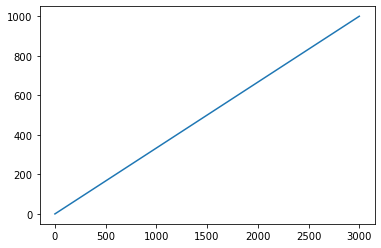

In [184]:
plt.plot(total_omega_array)
plt.show()

In [185]:
total_source_omega_array = np.zeros(total_omega_array.size) * complex(0,0)
total_source_omega_array[0:source_time_derivative_fft.size] = source_time_derivative_fft

In [186]:
total_x_array = np.arange(0,10000+dx,dx)

In [187]:
omega_mesh, x_mesh= np.meshgrid(total_omega_array, total_x_array)

In [188]:
print(x_mesh)
print(x_mesh.shape)

[[    0     0     0 ...     0     0     0]
 [   10    10    10 ...    10    10    10]
 [   20    20    20 ...    20    20    20]
 ...
 [ 9980  9980  9980 ...  9980  9980  9980]
 [ 9990  9990  9990 ...  9990  9990  9990]
 [10000 10000 10000 ... 10000 10000 10000]]
(1001, 3001)


In [189]:
print(omega_mesh)

[[0.00000000e+00 3.33333333e-01 6.66666667e-01 ... 9.99333333e+02
  9.99666667e+02 1.00000000e+03]
 [0.00000000e+00 3.33333333e-01 6.66666667e-01 ... 9.99333333e+02
  9.99666667e+02 1.00000000e+03]
 [0.00000000e+00 3.33333333e-01 6.66666667e-01 ... 9.99333333e+02
  9.99666667e+02 1.00000000e+03]
 ...
 [0.00000000e+00 3.33333333e-01 6.66666667e-01 ... 9.99333333e+02
  9.99666667e+02 1.00000000e+03]
 [0.00000000e+00 3.33333333e-01 6.66666667e-01 ... 9.99333333e+02
  9.99666667e+02 1.00000000e+03]
 [0.00000000e+00 3.33333333e-01 6.66666667e-01 ... 9.99333333e+02
  9.99666667e+02 1.00000000e+03]]


In [190]:
sigma_x_omega = -1 * (total_source_omega_array * np.exp(complex(0,1) * omega_mesh * x_mesh / c)) / (2 * complex(0,1) * omega_mesh + pow(10,-7))

In [191]:
sigma_x_omega_time_domain = np.fft.ifft(sigma_x_omega)

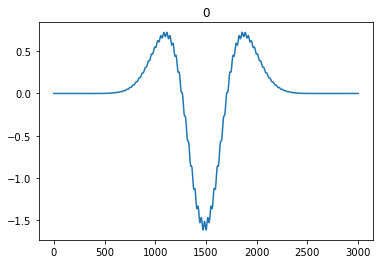

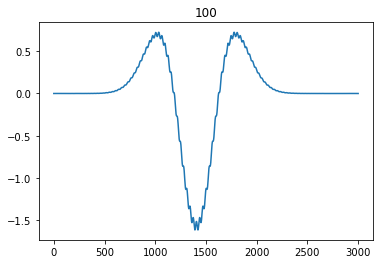

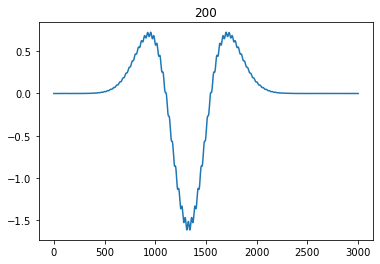

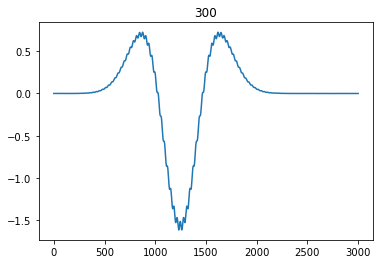

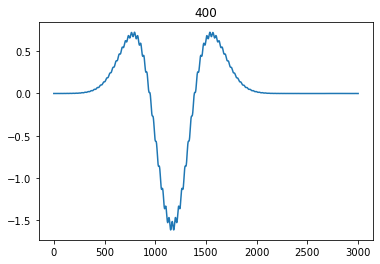

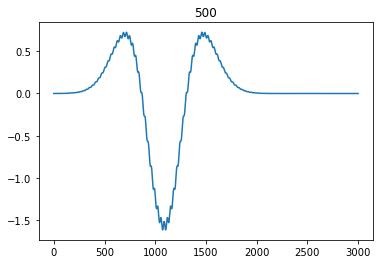

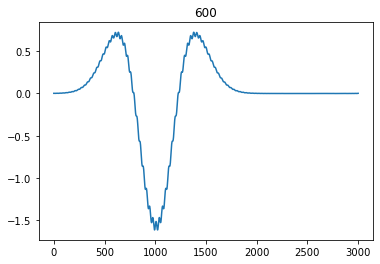

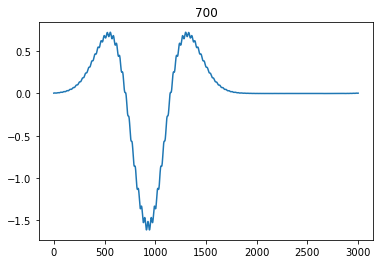

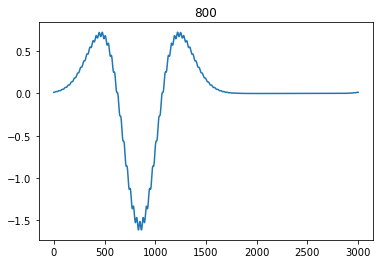

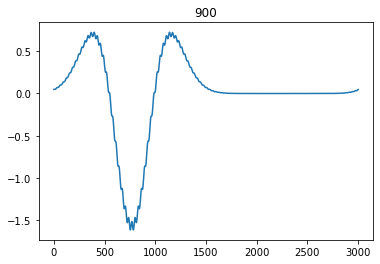

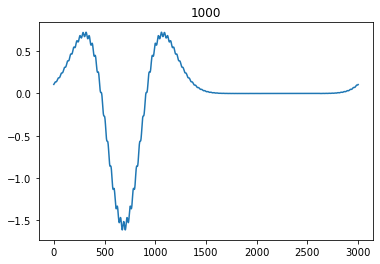

In [192]:
for i in range(1001):
    if i % 100 == 0:
        plt.plot(sigma_x_omega_time_domain[i,:].real)
        plt.title(str(i))
        plt.show()

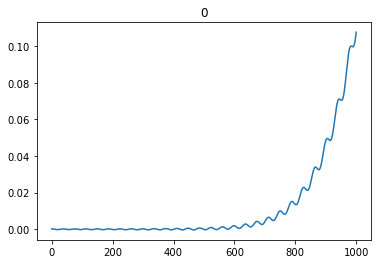

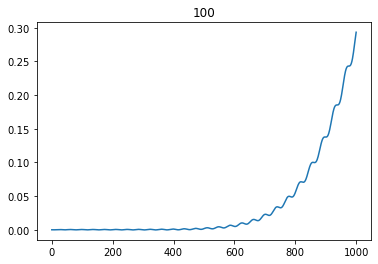

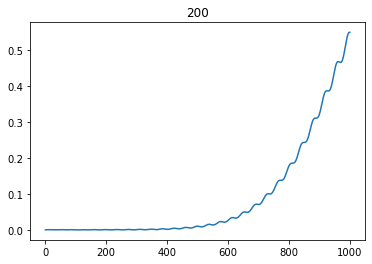

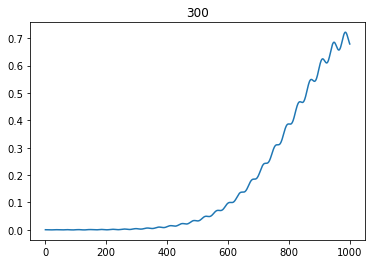

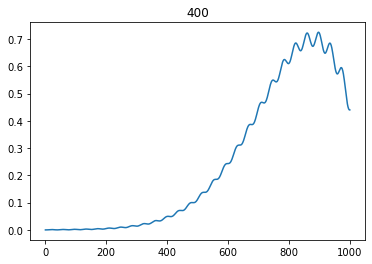

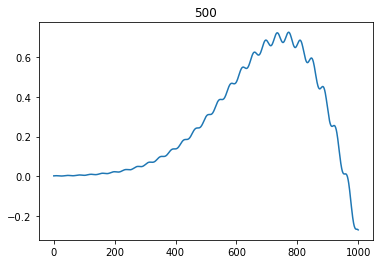

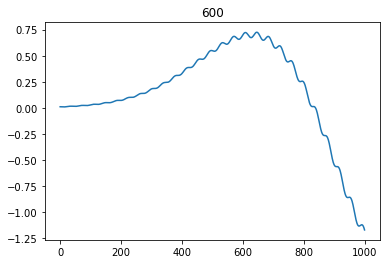

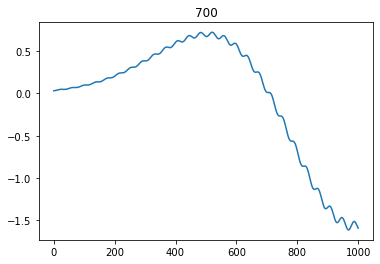

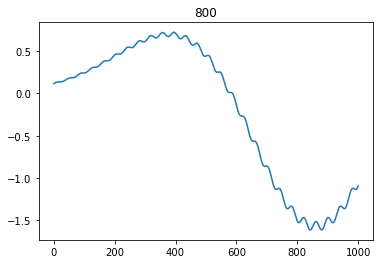

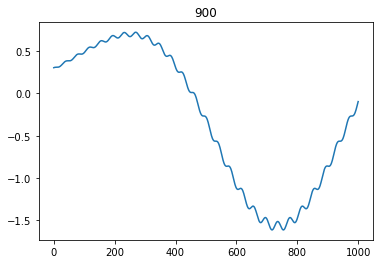

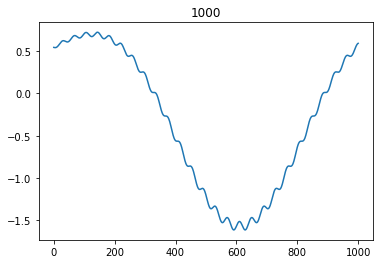

In [193]:
for i in range(1001):
    if i % 100 == 0:
        plt.plot(sigma_x_omega_time_domain[:,i].real)
        plt.title(str(i))
        plt.show()

In [231]:
source_time_array_full = np.linspace(0, 3+dt, 3001)

source_array_full = (1 - 2 * (pi * f_m * (source_time_array_full-t_0))**2) \
                * np.exp(-1 * ( pi * f_m * (source_time_array_full-t_0))**2)

source_time_derivative_full = 1 * (-4 * (pi * f_m * (source_time_array_full-t_0)) * pi * f_m * \
                         np.exp(-1 * ( pi * f_m * (source_time_array_full-t_0))**2) + \
                         (1 - 2 * (pi * f_m * (source_time_array_full-t_0))**2) * \
                         np.exp(-1 * ( pi * f_m * (source_time_array_full-t_0))**2) * \
                            -2 * (pi * f_m * (source_time_array_full-t_0)) * pi * f_m)

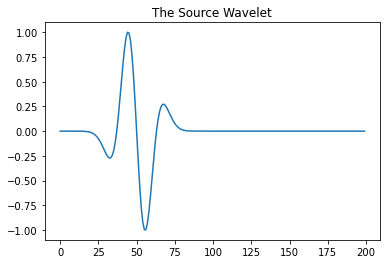

In [232]:
plt.plot(source_time_array_full[0:200] * 1000, normalization(source_time_derivative_full[0:200]))
plt.title('The Source Wavelet')
plt.show()

In [233]:
total_source_omega_array_full = np.fft.fft(source_time_derivative_full)

In [234]:
sigma_x_omega_full = 1 * (total_source_omega_array_full * np.exp(complex(0,1) * omega_mesh * x_mesh / c)) / (2 * complex(0,1) * omega_mesh + pow(10,-7))

In [235]:
sigma_x_omega_time_domain_full = sigma_x_omega_full
for i in range(1001):
    sigma_x_omega_time_domain_full[i,:] = np.fft.ifft(sigma_x_omega_full[i,:])

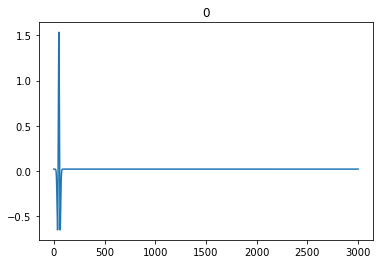

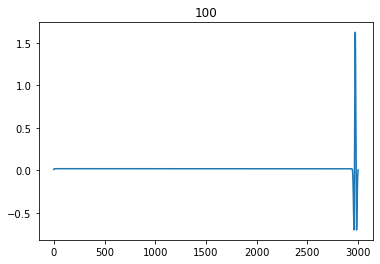

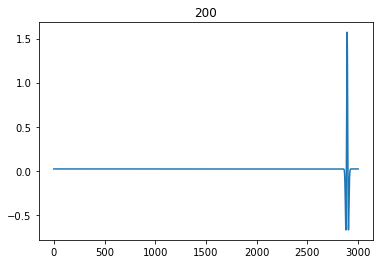

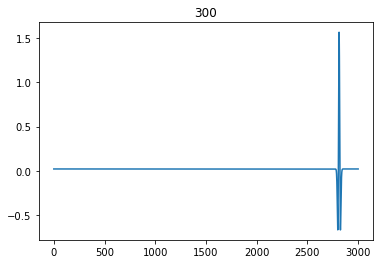

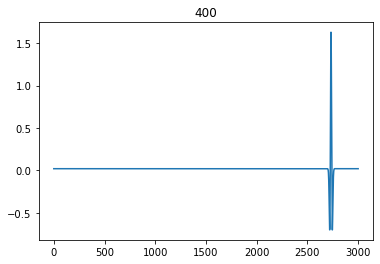

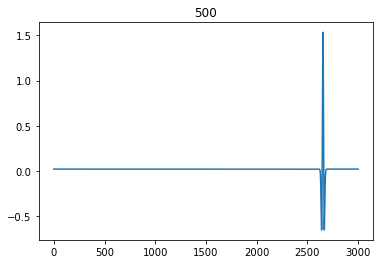

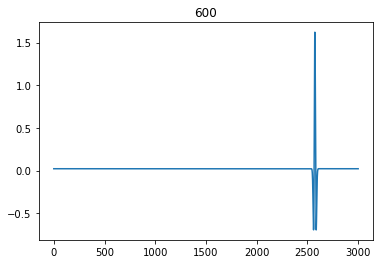

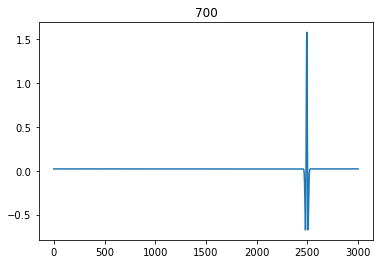

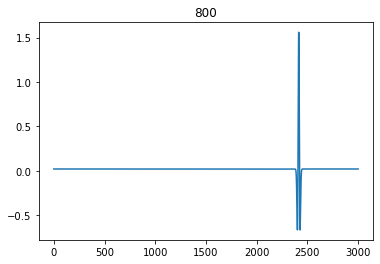

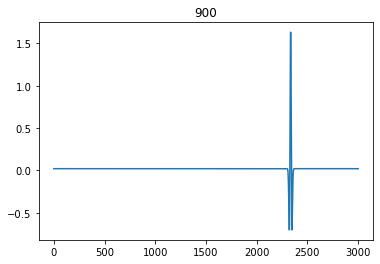

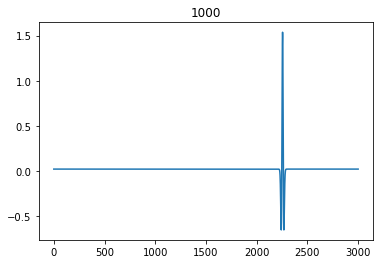

In [236]:
for i in range(1001):
    if i % 100 == 0:
        plt.plot(sigma_x_omega_time_domain_full[i,:].real)
        plt.title(str(i))
        plt.show()

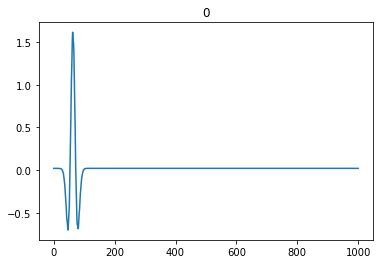

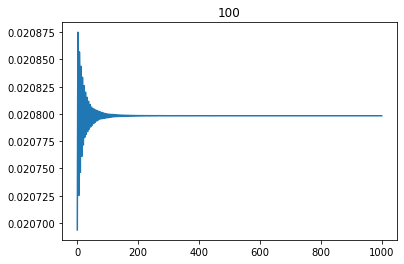

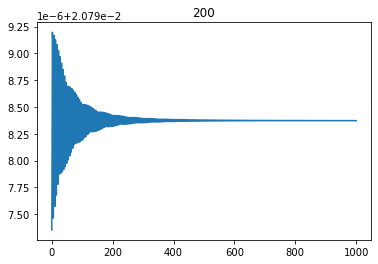

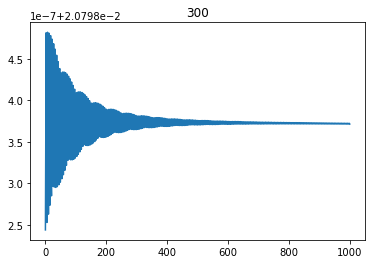

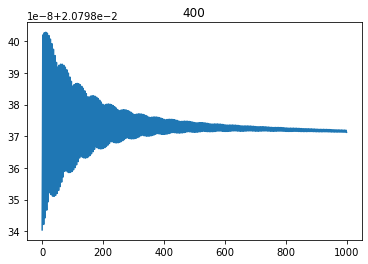

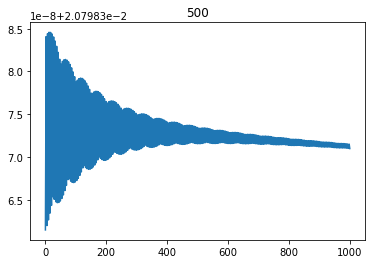

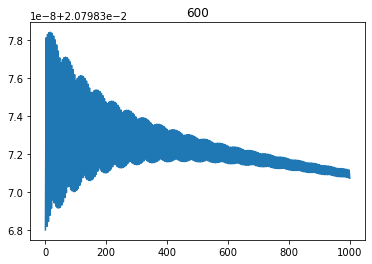

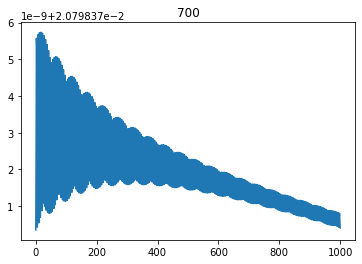

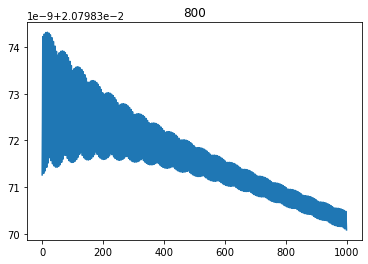

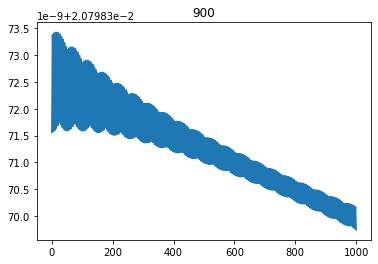

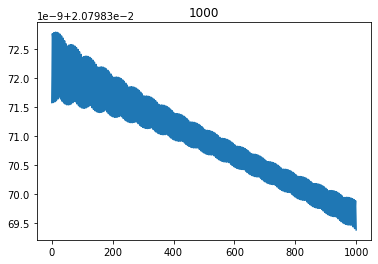

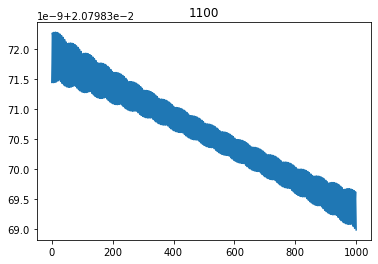

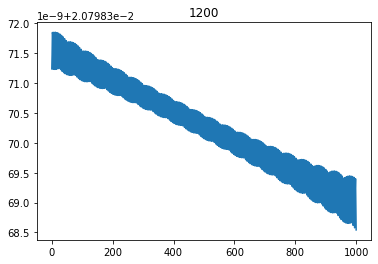

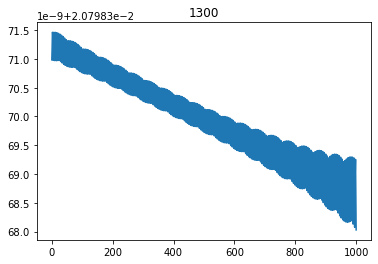

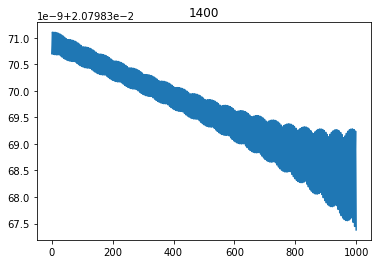

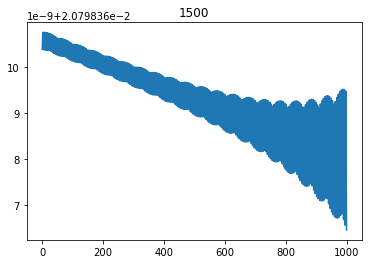

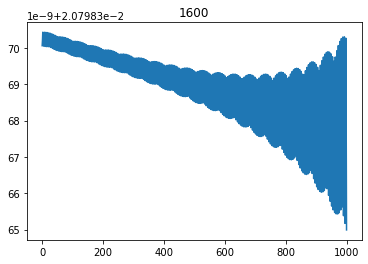

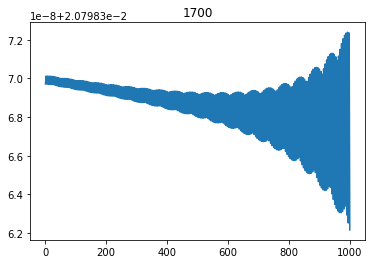

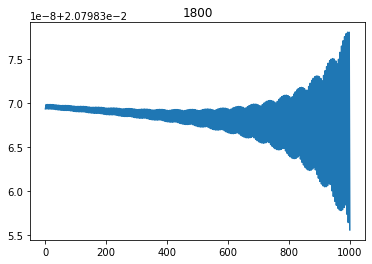

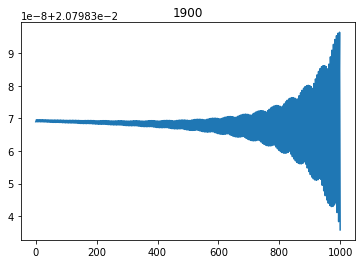

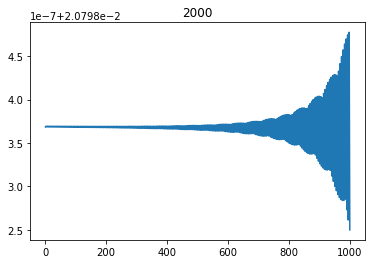

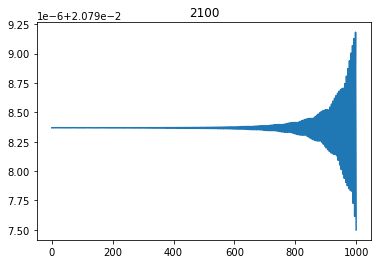

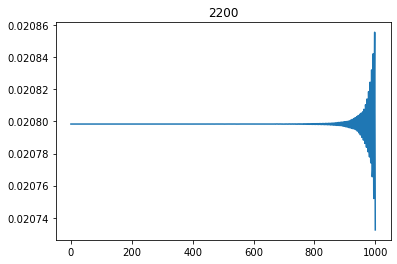

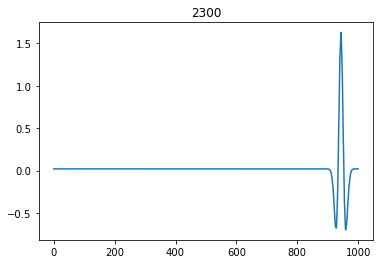

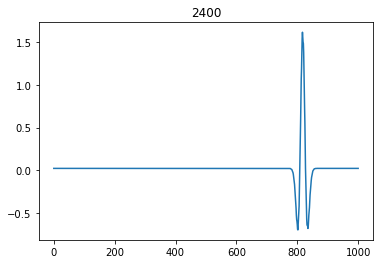

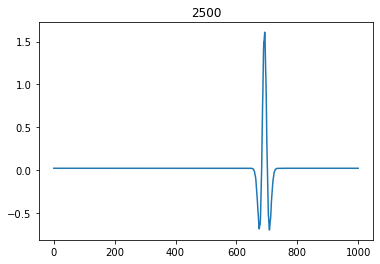

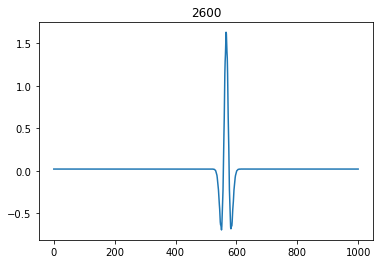

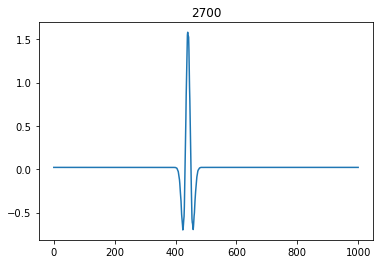

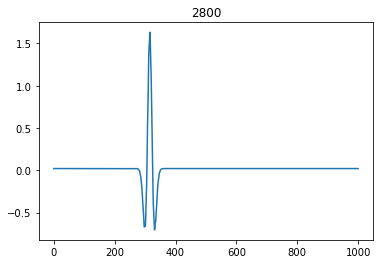

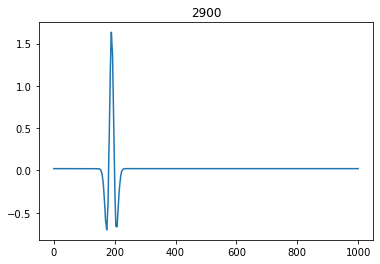

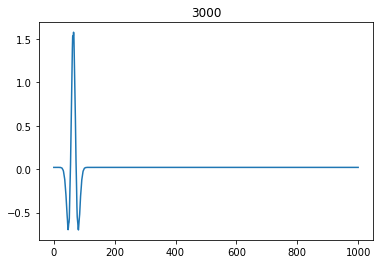

In [237]:
for i in range(3001):
    if i % 100 == 0:
        plt.plot(sigma_x_omega_time_domain_full[:,i].real)
        plt.title(str(i))
        plt.show()

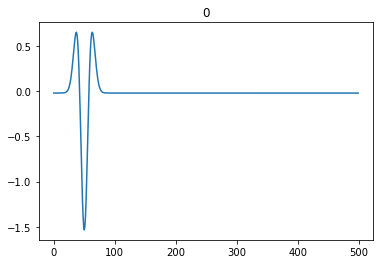

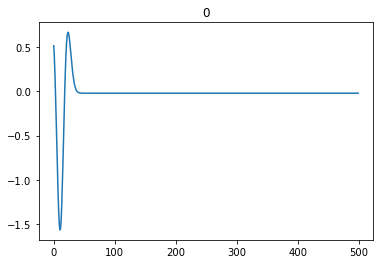

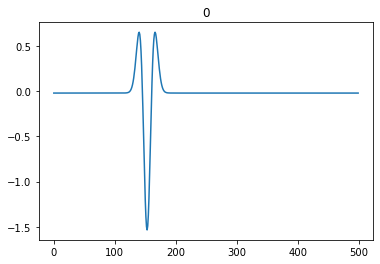

In [229]:
plt.plot(sigma_x_omega_time_domain_full[0,0:500].real)
plt.title(str(0))
plt.show()

plt.plot(sigma_x_omega_time_domain_full[50,0:500].real)
plt.title(str(0))
plt.show()

plt.plot(sigma_x_omega_time_domain_full[500,2500:3000].real)
plt.title(str(0))
plt.show()